In [1]:
import pandas as pd


In [2]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
#Vinho branco será 0
df_white['color'] = 0
#Vinho tinto será 1
df_red['color'] = 1


In [4]:
# Concatenando os dois datasets em um único e salvando o dataset completo
df = pd.concat([df_red, df_white], ignore_index=True)
df.to_csv('winequality_with_colors.csv', sep=';', index=False)

# Carregando o novo dataset
df = pd.read_csv('winequality_with_colors.csv', sep=';')
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import numpy as np
import pytensor.tensor as tt

# Análise exploratória de dados


In [6]:
#Verificando se há linhas vazias
linhas_vazias = df.isna().sum()
print(linhas_vazias)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


# Gráfico de distribuição das variáveis alvo

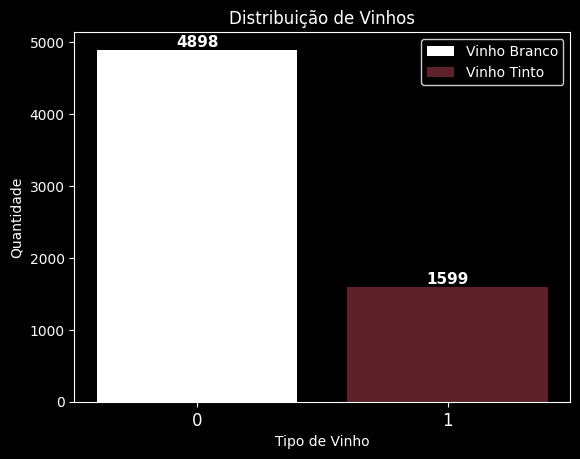

In [8]:
color_counts = df['color'].value_counts().sort_index()

plt.style.use('dark_background')
fig, ax = plt.subplots()
bars = ax.bar([0, 1], color_counts.sort_index(), color=['white', '#5e2129'],
              label=['Vinho Branco', 'Vinho Tinto'])

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center',
            va='bottom', fontsize=11,fontweight='bold', color='white')

ax.set_xlabel('Tipo de Vinho', color='white')
ax.set_ylabel('Quantidade', color='white')
ax.set_title('Distribuição de Vinhos', color='white')

ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'], color='white', fontsize=12)

ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')

plt.legend(bars, ['Vinho Branco', 'Vinho Tinto'], facecolor='black', edgecolor='white', fontsize=10)

plt.show()

 Observando o gráfico vemos um claro desbalaceamento no nosso conjunto de dados com vinho branco (alvo 0) representando 75,38%, e o vinho tinto (alvo 1) representando 24,62% do nosso conjunto de dados.

In [9]:
#Separando a variável alvo das preditoras
x_f = df.drop(['color'], axis=1)
y_t = df["color"]

In [10]:
display(x_f)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [11]:
display(y_t)

,color
0,1
1,1
2,1
3,1
4,1
...,...
6492,0
6493,0
6494,0
6495,0


# Matriz de Correlação das variáveis preditoras

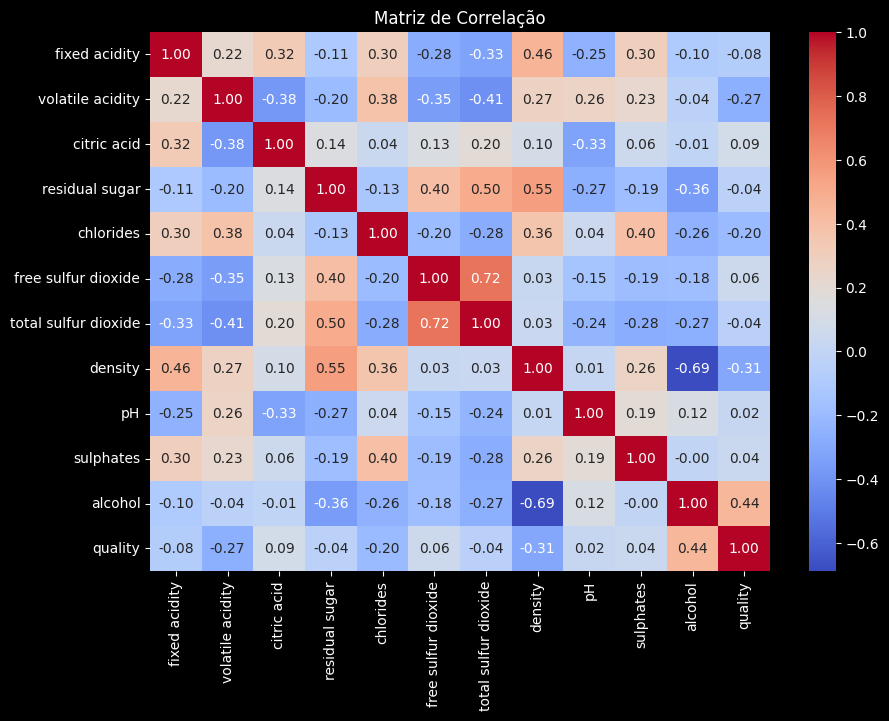

In [12]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(x_f.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
ax.set_title("Matriz de Correlação")
plt.show()


A feature free sulfur dioxide está altamente correlacionada com a total sulfur dioxide, o que pode ocasionar problemas de multicolinearidade; portanto, vamos verificar essa situação em relação a todas as features escolhidas, pois há outras que também apresentam correlações moderadas a altas entre si.

**Calculando a VIF (Variance Inflation Factor) para verificar a multicolinearidade**

In [13]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_f_const = sm.add_constant(x_f)

vif_data = pd.DataFrame({
    'Variável': x_f_const.columns,
    'VIF': [variance_inflation_factor(x_f_const.values, i) for i in range(x_f_const.shape[1])]
})

print(vif_data)

                Variável           VIF
0                  const  1.705545e+06
1          fixed acidity  4.911189e+00
2       volatile acidity  2.037955e+00
3            citric acid  1.608690e+00
4         residual sugar  7.308546e+00
5              chlorides  1.632490e+00
6    free sulfur dioxide  2.156281e+00
7   total sulfur dioxide  2.974040e+00
8                density  1.596483e+01
9                     pH  2.545764e+00
10             sulphates  1.565737e+00
11               alcohol  4.970044e+00
12               quality  1.412703e+00


A variável density apresenta um VIF de aproximadamente 15,9, o que indica que a variável density está altamente correlacionada com outras variáveis preditoras.

**Normalizando todas as variáveis**

In [14]:
x_f["fixed acidity"] = (x_f["fixed acidity"]-x_f["fixed acidity"].mean())/x_f["fixed acidity"].std()
x_f["volatile acidity"] = (x_f["volatile acidity"]-x_f["volatile acidity"].mean())/x_f["volatile acidity"].std()
x_f["citric acid"] = (x_f["citric acid"]-x_f["citric acid"].mean())/x_f["citric acid"].std()
x_f["residual sugar"] = (x_f["residual sugar"]-x_f["residual sugar"].mean())/x_f["residual sugar"].std()
x_f["chlorides"] = (x_f["chlorides"]-x_f["chlorides"].mean())/x_f["chlorides"].std()
x_f["free sulfur dioxide"] = (x_f["free sulfur dioxide"]-x_f["free sulfur dioxide"].mean())/x_f["free sulfur dioxide"].std()
x_f["total sulfur dioxide"] = (x_f["total sulfur dioxide"]-x_f["total sulfur dioxide"].mean())/x_f["total sulfur dioxide"].std()
x_f["density"] = (x_f["density"]-x_f["density"].mean())/x_f["density"].std()
x_f["pH"] = (x_f["pH"]-x_f["pH"].mean())/x_f["pH"].std()
x_f["sulphates"] = (x_f["sulphates"]-x_f["sulphates"].mean())/x_f["sulphates"].std()
x_f["alcohol"] = (x_f["alcohol"]-x_f["alcohol"].mean())/x_f["alcohol"].std()
x_f["quality"] = (x_f["quality"]-x_f["quality"].mean())/x_f["quality"].std()

display(x_f)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,-0.937157
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,-0.937157
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,0.207983
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783154,-0.787590,-0.197039,-0.807775,-0.486215,-0.367636,-0.420095,-1.186069,0.320294,-0.210128,0.593772,0.207983
6493,-0.474615,-0.119451,0.284664,0.537383,-0.257863,1.491582,0.924517,0.067819,-0.426034,-0.478935,-0.747709,-0.937157
6494,-0.551750,-0.605370,-0.885185,-0.891847,-0.429127,-0.029596,-0.083942,-0.719196,-1.421138,-0.478935,-0.915394,0.207983
6495,-1.323097,-0.301671,-0.128224,-0.912866,-0.971463,-0.592996,-0.101635,-2.003097,0.755652,-1.016548,1.935253,1.353124


*Aplicando* o PCA nas Variáveis Density, Residual Sugar e Alcohol, free sulfur dioxide , total sulfur dioxide

In [15]:
from sklearn.decomposition import PCA

features_group_1 = ['density', 'residual sugar', 'alcohol']

X_group_1 = x_f[features_group_1]

pca_1 = PCA(n_components=1)
combined_feature_1 = pca_1.fit_transform(X_group_1)
x_f['pca_1'] = combined_feature_1

features_group_2 = ['free sulfur dioxide', 'total sulfur dioxide']

X_group_2 = x_f[features_group_2]

pca_2 = PCA(n_components=1)
combined_feature_2 = pca_2.fit_transform(X_group_2)
x_f['pca_2'] = combined_feature_2

In [16]:
display(x_f)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pca_1,pca_2
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157,0.797375,-1.800508
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,-0.937157,0.469144,-0.829930
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,-0.937157,0.478749,-1.390948
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,0.207983,0.646327,-1.236209
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157,0.797375,-1.800508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783154,-0.787590,-0.197039,-0.807775,-0.486215,-0.367636,-0.420095,-1.186069,0.320294,-0.210128,0.593772,0.207983,-1.510504,-0.557010
6493,-0.474615,-0.119451,0.284664,0.537383,-0.257863,1.491582,0.924517,0.067819,-0.426034,-0.478935,-0.747709,-0.937157,0.751675,1.708440
6494,-0.551750,-0.605370,-0.885185,-0.891847,-0.429127,-0.029596,-0.083942,-0.719196,-1.421138,-0.478935,-0.915394,0.207983,-0.388841,-0.080284
6495,-1.323097,-0.301671,-0.128224,-0.912866,-0.971463,-0.592996,-0.101635,-2.003097,0.755652,-1.016548,1.935253,1.353124,-2.854961,-0.491178


In [17]:
# Dropando as antigas features, já que temos agora elas combinadas em uma só
x_f = x_f.drop(['density', 'residual sugar', 'alcohol','free sulfur dioxide', 'total sulfur dioxide'], axis=1)

Matriz de Correlação das variáveis preditoras (com os pcas)

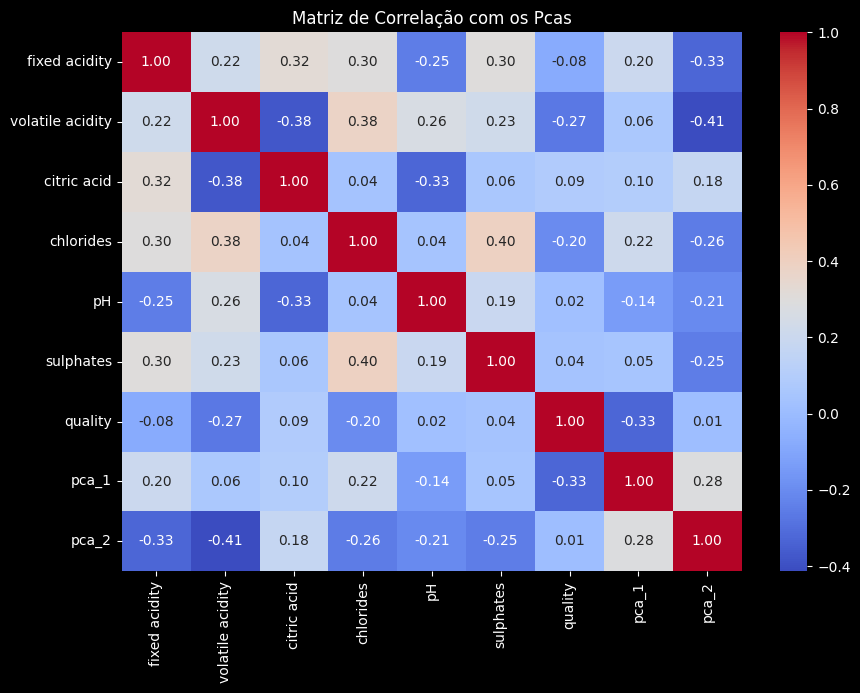

In [18]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(x_f.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
ax.set_title("Matriz de Correlação com os Pcas")
plt.show()


Verificando mais uma vez o VIF (Variance Inflation Factor)

In [19]:
x_f_const = sm.add_constant(x_f)

vif_data = pd.DataFrame({
    'Variável': x_f_const.columns,
    'VIF': [variance_inflation_factor(x_f_const.values, i) for i in range(x_f_const.shape[1])]
})

print(vif_data)

           Variável       VIF
0             const  1.000000
1     fixed acidity  1.820153
2  volatile acidity  1.781932
3       citric acid  1.558445
4         chlorides  1.464520
5                pH  1.362183
6         sulphates  1.361711
7           quality  1.232185
8             pca_1  1.436089
9             pca_2  1.713232


Está tudo certo agora, vamos continuar

In [20]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x_f, y_t, test_size=0.2, random_state=42)

In [21]:
display(x_treino)

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,quality,pca_1,pca_2
1916,-0.474615,-0.605370,0.215849,-0.714567,-0.177258,-1.083749,-0.937157,0.052079,0.458994
947,0.836674,-0.362411,1.110440,1.055162,0.258100,0.596292,1.353124,-1.415443,-2.274927
877,0.373866,2.279774,-2.123849,0.227386,1.191010,0.260284,0.207983,-1.203645,-0.891148
2927,-1.554501,0.184248,0.078220,-0.800199,0.942234,-1.016548,0.207983,-1.993941,-1.132846
6063,-0.474615,-0.483890,1.660957,-0.086599,-0.674810,-0.277330,-0.937157,2.376259,0.374702
...,...,...,...,...,...,...,...,...,...
3772,0.296732,-0.119451,1.798587,-0.172231,-0.426034,0.058679,-0.937157,2.951193,1.088151
5191,-1.245962,-0.362411,-0.334668,-0.372039,0.817846,-0.613338,1.353124,-0.833228,1.384145
5226,-0.628884,0.184248,-0.816370,1.740219,0.133712,-0.680540,-0.937157,0.473718,2.055448
5390,-0.551750,-0.483890,1.248069,-0.143687,-0.239452,-0.411733,-0.937157,0.897073,1.633018


In [22]:
display(y_treino)

,color
1916,0
947,1
877,1
2927,0
6063,0
...,...
3772,0
5191,0
5226,0
5390,0


In [23]:
coords = {
    'features': ['fixed acidity',	'volatile acidity', 'citric acid' ,	'chlorides','pH','sulphates',	'quality',	'pca_1',	'pca_2']
}

In [24]:
with pm.Model(coords=coords) as model_logistic:
  betas = pm.Normal("beta",0,0.25,dims="features")
  alpha = pm.Normal("alpha",0,0.25)

  X = [
    pm.MutableData("X_"+column,x_treino[column].values)
    for column in x_treino.columns if np.issubdtype(x_f[column].dtype, np.number)
  ]

  y = pm.MutableData("y",y_treino)

  mu = alpha + tt.dot(betas,X)
  likelihood = pm.Bernoulli("likelihood",pm.math.invlogit(mu),observed=y)

/usr/local/lib/python3.11/dist-packages/pymc/data.py:265: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


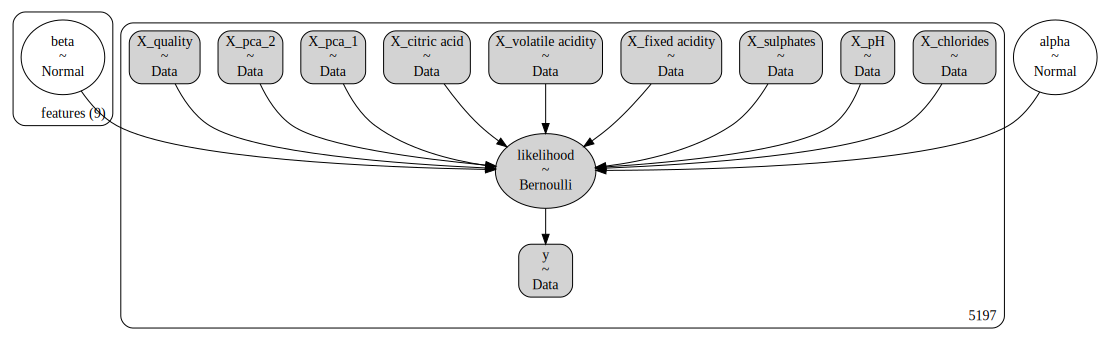

In [25]:
pm.model_to_graphviz(model_logistic)

In [26]:
with model_logistic:
  trace = pm.sample()

Output()

In [27]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-2.700,0.094,-2.868,-2.525,0.002,0.002,2735.0,1516.0,1.0
beta[fixed acidity],1.389,0.109,1.178,1.583,0.002,0.002,2891.0,1822.0,1.0
beta[volatile acidity],1.124,0.092,0.959,1.299,0.002,0.002,2423.0,1851.0,1.0
beta[citric acid],-0.396,0.093,-0.568,-0.231,0.002,0.002,2371.0,1375.0,1.0
beta[chlorides],1.037,0.094,0.863,1.218,0.002,0.002,2546.0,1515.0,1.0
beta[pH],1.001,0.084,0.844,1.157,0.002,0.002,2502.0,1459.0,1.0
beta[sulphates],0.890,0.084,0.714,1.029,0.002,0.002,2941.0,1545.0,1.0
beta[quality],0.183,0.079,0.042,0.338,0.002,0.002,2771.0,1609.0,1.0
beta[pca_1],0.199,0.073,0.056,0.329,0.001,0.002,2796.0,1744.0,1.0
beta[pca_2],-1.501,0.086,-1.668,-1.345,0.002,0.002,2059.0,1695.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

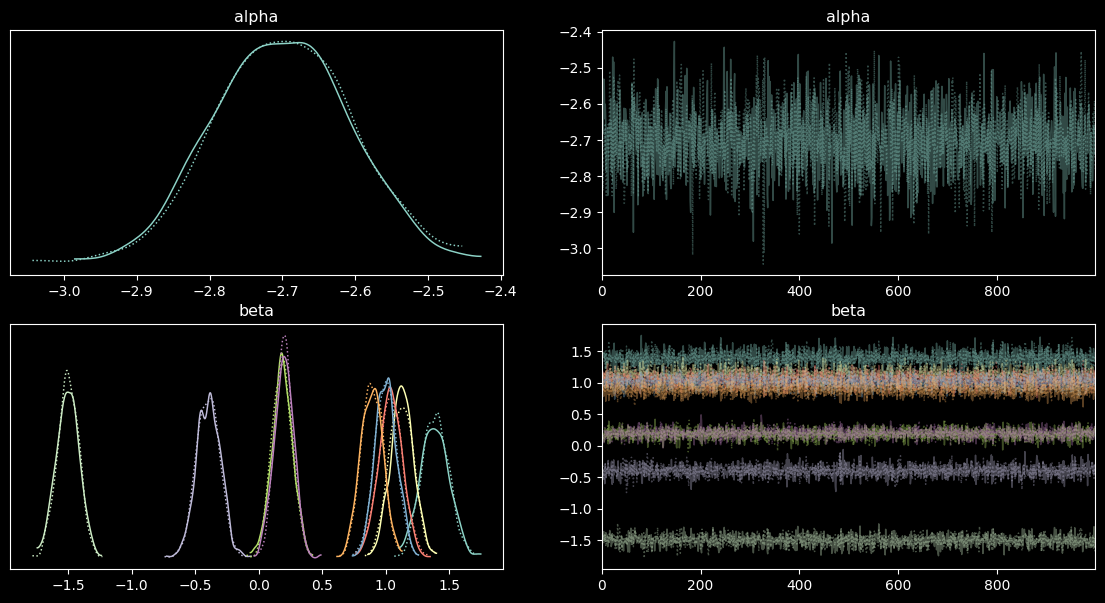

In [28]:
az.plot_trace(trace, figsize=(14, 7))

In [29]:
vars = {"X_"+column : x_teste[column].values
    for column in x_teste.columns if np.issubdtype(x_teste[column].dtype, np.number)}
vars["y"] = y_teste

In [30]:
with model_logistic:
  pm.set_data(vars)
  trace_post = pm.sample_posterior_predictive(trace)

Output()

In [31]:
mean_likelihood = trace_post.posterior_predictive['likelihood'].mean(dim=['chain', 'draw'])
pred = (mean_likelihood > 0.5).astype(int)

In [32]:
abs_diff = np.abs(y_teste - pred)

df_testes = pd.DataFrame({
    'y_teste': y_teste,
    'Pred_modelo': pred,
    'abs_diff': abs_diff
})

display(df_testes)

,y_teste,Pred_modelo,abs_diff
3103,0,0,0
1419,1,1,0
4761,0,0,0
4690,0,0,0
4032,0,0,0
...,...,...,...
889,1,1,0
2850,0,0,0
4917,0,0,0
5198,0,0,0


# Matriz de Confusão

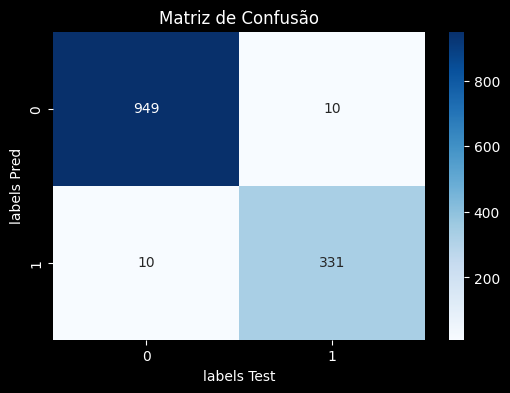

In [33]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_teste, pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel('labels Test')
plt.ylabel('labels Pred')
plt.show()


Métricas estatísticas para verificar como o desbalanceamento do conjunto de dados afetou o desempenho do modelo

In [38]:
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             precision_score, recall_score,f1_score,
                             cohen_kappa_score)
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import binomtest
from statsmodels.stats.contingency_tables import mcnemar

errors = df_testes['abs_diff'].sum()
accuracy = (len(df_testes)-errors)/len(df_testes)

n = len(y_teste)

cm = confusion_matrix(y_teste, pred)
TN, FP, FN, TP = cm.ravel()


ci_low, ci_upp = proportion_confint(count=int(accuracy * n), nobs=n, alpha=0.05, method='wilson')

classes, counts = np.unique(y_teste, return_counts=True)
NIR = np.max(counts) / n

result_binom = binomtest(k=int(accuracy * n), n=n, p=NIR, alternative='greater')
p_value_acc_gt_NIR = result_binom.pvalue

kappa = cohen_kappa_score(y_teste, pred)

sensitivity = TP / (TP + FN) if (TP + FN) > 0 else np.nan

specificity = TN / (TN + FP) if (TN + FP) > 0 else np.nan

pos_pred_value = precision_score(y_teste, pred)

f1 = f1_score(y_teste, pred)

neg_pred_value = TN / (TN + FN) if (TN + FN) > 0 else np.nan

prevalence = np.sum(y_teste == 1) / n

detection_rate = TP / n

detection_prevalence = (TP + FP) / n

balanced_accuracy = balanced_accuracy_score(y_teste, pred)

table_mcnemar = [[0, FP],
                 [FN, 0]]
result_mcnemar = mcnemar(table_mcnemar, exact=True)
mcnemar_p_value = result_mcnemar.pvalue

print(f"Acurácia no conjunto de teste: {accuracy*100:.2f}%")
print(f"\nErros no conjunto de teste: {errors}")
print("\n95% CI da Acurácia: [{:.3f}, {:.3f}]".format(ci_low, ci_upp))
print("\nNo Information Rate: {:.3f}".format(NIR))
print("\nP-Value [Acc > NIR]: {:.3f}".format(p_value_acc_gt_NIR))
print("\nKappa: {:.3f}".format(kappa))
print("\nMcnemar's Test P-Value: {:.3f}".format(mcnemar_p_value))
print("\nSensitivity (Recall): {:.3f}".format(sensitivity))
print("\nSpecificity: {:.3f}".format(specificity))
print("\nPos Pred Value (Precision): {:.3f}".format(pos_pred_value))
print(f"\nF1 Score: {f1:.3f}")
print("\nNeg Pred Value: {:.3f}".format(neg_pred_value))
print("\nPrevalence: {:.3f}".format(prevalence))
print("\nDetection Rate: {:.3f}".format(detection_rate))
print("\nDetection Prevalence: {:.3f}".format(detection_prevalence))
print("\nBalanced Accuracy: {:.3f}".format(balanced_accuracy))

Acurácia no conjunto de teste: 98.46%

Erros no conjunto de teste: 20

95% CI da Acurácia: [0.976, 0.990]

No Information Rate: 0.738

P-Value [Acc > NIR]: 0.000

Kappa: 0.960

Mcnemar's Test P-Value: 1.000

Sensitivity (Recall): 0.971

Specificity: 0.990

Pos Pred Value (Precision): 0.971

F1 Score: 0.971

Neg Pred Value: 0.990

Prevalence: 0.262

Detection Rate: 0.255

Detection Prevalence: 0.262

Balanced Accuracy: 0.980


# Análises das Métricas:
- Acurácia no conjunto de teste sendo 98.46%, demonstra um excelente desempenho do modelo no conjunto de teste

- Erros no conjunto de testes sendo 20 em 1300 (total de dados no conjunto de teste) indica que o modelo errou aproximadamente 1,53% ou seja um erro bem baixo

- 95% CI da Acurácia entre 0.976 a 0.990, Esse intervalo indica que, repetindo a avaliação em amostras semelhantes, 95% das vezes a acurácia ficaria consistentemente entre 97,6% e 99%. Isso demonstra estabilidade consistente no desempenho do modelo.

- No Information Rate sendo 0.738 indica a acurácia que se obteria do modelo   sempre que ele prevesse a classe majoritária (neste caso, vinho branco, 73,8%)

- P-Value [Acc > NIR] sendo 0.000 indica que, estatisticamente, a acurácia do modelo é significativamente superior à acurácia do modelo ingênuo (No Information Rate ou NIR) que prevê sempre a classe majoritária, o que confirma que o modelo preveu padrões relevantes e não apenas se beneficiou o desbalanceamento do conjunto de dados

- Kappa sendo 0.960 indica que a concordância entre as predições e os valores reais corrigidos pelo acaso, está quase perfeita, reforçando a robustez do modelo mesmo em face do desbalanceamento

- Mcnemar's Test P-Value sendo 1.000 indica que não há diferença estatisticamente significativa entre os erros cometidos nas duas classes

- Sensitivity ou Recall sendo 0.971 indica que 97,1% dos vinhos tintos (classe positiva ou 1) foram corretamente identificados

- Specificity sendo 0.99 indica que 99% dos vinhos brancos (classe negativa ou 0) foram corretamente classificados

- Pos Pred Value ou Precision sendo 0.971 indica que quando o modelo prediz um vinho tinto, ele está correto em 97,1% dos casos

- F1 Score sendo 0.971 indica que o desempenho do modelo é excelente, pois ele consegue balancear muito bem a taxa de verdadeiros positivos e a minimização dos falsos positivos

- Neg Pred Value sendo 0.99 indica que quando o modelo prediz um vinho branco, a acurácia de sua predição está correta em 98,4% dos casos

- Prevalence sendo 0.262 indica que, no conjunto de teste, 26,2% dos casos são de vinho tinto. Esse valor é próximo ao desbalanceamento original (24,62%), mostrando que a amostra de teste reflete muito bem a distribuição no conjunto de dados original.

- Detection Rate sendo 0.255 indica que 25,5% de todos os casos foram corretamente classificados como vinho tinto, o que é excelente dado a sua prevalence total do conjunto de 26,2%

- Detection Prevalence sendo 0.262(26,2%) das predições foram de vinho tinto, o que indica que o modelo está alinhado com a prevalência real do conjunto.

- Balanced Accuracy sendo 98% (bem alinhada com a acurácia no conjunto de teste) mostra que, mesmo considerando o desbalanceamento, o modelo está performando de forma excelente para ambas as classes

# **Consideração Final**

O modelo apresentou um desempenho excelente, porém acredito que ainda há espaço para aperfeiçoamento, eu Testei com  diferentes priors (média,variância):
(0,1)| (0,2)| (0,3)| (0,4)| (0,5)| (0,10)| (0, 0.5)| (0,0.25)| (0,0.3) sendo a melhor delas a (0,0.25), e como foi análisado nas métricas o desbalanceamento do modelo não afetou seu desempenho ou seja não há viés significativo entre a classificação das classes, ele é capaz de distinguir com alta precisão entre vinho tinto e vinho branco.